In [1]:
import cv2
from darkflow.net.build import TFNet
import matplotlib.pyplot as plt

%config inlineBackend.figure_format = 'svg' 

In [2]:
options = {
    'model' : 'cfg/yolo.cfg',
    'load' : 'bin/yolov2.weights',
    'threshold' : 0.3,
    'gpu' : 1.0
}

tfnet = TFNet(options)

Parsing cfg/yolo.cfg
Loading bin/yolov2.weights ...
Successfully identified 203934260 bytes
Finished in 0.038004159927368164s
Model has a coco model name, loading coco labels.

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
Instructions for updating:
Colocations handled automatically by placer.


X:\0 Spring 2019\CS 682\project\proj_new\darkflow\darkflow\dark\darknet.py:54: UserWarning: ./cfg/yolov2.cfg not found, use cfg/yolo.cfg instead
  cfg_path, FLAGS.model))


       |        | input                            | (?, 608, 608, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 608, 608, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 304, 304, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 304, 304, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 152, 152, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 152, 152, 128)
 Load  |  Yep!  | conv 1x1p0_1  +bnorm  leaky      | (?, 152, 152, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 152, 152, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 76, 76, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 76, 76, 256)
 Load  |  Yep!  | conv 1x1p0_1  +bnorm  leaky      | (?, 76, 76, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 76, 76, 256)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 38, 38, 256)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 38, 38, 512)
 Load  |  Y

In [6]:
img = cv2.imread('dog.jpg',cv2.IMREAD_UNCHANGED)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
result = tfnet.return_predict(img)


result

[{'label': 'dog',
  'confidence': 0.723365,
  'topleft': {'x': 267, 'y': 46},
  'bottomright': {'x': 619, 'y': 599}}]

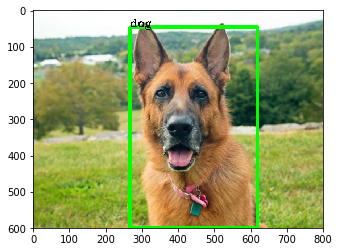

In [8]:
tl = (result[0]['topleft']['x'], result[0]['topleft']['y'])
br = (result[0]['bottomright']['x'], result[0]['bottomright']['y'])
label = result[0]['label']

img = cv2.rectangle(img, tl, br, (0,255,0), 7)
img = cv2.putText(img, label, tl,cv2.FONT_HERSHEY_COMPLEX, 1, (0,0,0), 2)

plt.imshow(img)
plt.show()